In [38]:
import os
import matplotlib.pyplot as plt
import data_filter as dafi
import estimate_height as esth

WAVELENTH_S1 = 0.1905 # meter

In [39]:
main_path = 'E:/OneDrive/Studium/MA/data/phnx/'
main_path = 'E:/OneDrive/Studium/MA/data/phnx/'

main_path = os.path.abspath('../data/20220522/2/')
main_path = os.path.abspath('../data/phnx/')
#main_path = os.path.abspath('../data/sc02/')


data_dict = dafi.generate_dataframe(main_path)
satellite_list = data_dict.keys()

azimut_mask = [0,360]  # for ess2
min_height = 1
max_height = 3 # meter

azimut_mask = [0,360]  # for phnx
min_height = 1
max_height = 3 # meter


'''azimut_mask = [90,180] # for sc02
min_height = 4
max_height = 8 # meter'''


time_interval = 30 # minutes


elevation_mask = [0,13]
for satellite_code in satellite_list:
    data_dict[satellite_code] = dafi.azimut_filter(data_dict[satellite_code],azimut_mask)
    data_dict[satellite_code] = dafi.elevation_filter(data_dict[satellite_code],elevation_mask)

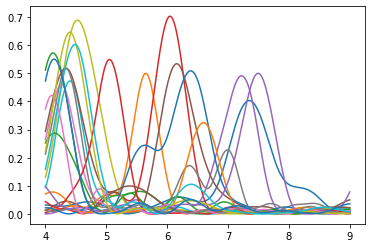

In [40]:
time_dict = {}
height_dict = {}
azimut_dict = {}
for satellite_code in data_dict:
    dataframe = data_dict[satellite_code]
    if not dataframe.empty:
        time_dict[satellite_code], height_dict[satellite_code], azimut_dict[satellite_code]\
             = esth.split_result(dataframe,time_interval,min_height,max_height)

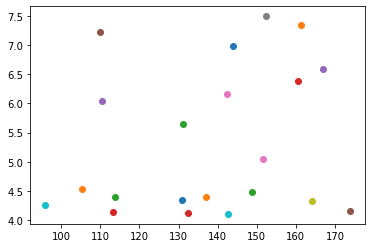

In [41]:
for satellite_code in azimut_dict:
    plt.scatter(azimut_dict[satellite_code], height_dict[satellite_code])